#### 🧾Section 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#### 📥Section 2: Load Data

In [2]:
# Load the dataset
data = pd.read_csv('data/train.csv')

# View the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 🔍Section 3: Data Exploration (EDA)

In [3]:
# Check basic info
data.info()

# Check null values
data.isnull().sum()

# Basic stats
data.describe()

# Check unique values in 'Sex', 'Embarked', etc.
print(data['Sex'].unique())
print(data['Embarked'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
['male' 'female']
['S' 'C' 'Q' nan]


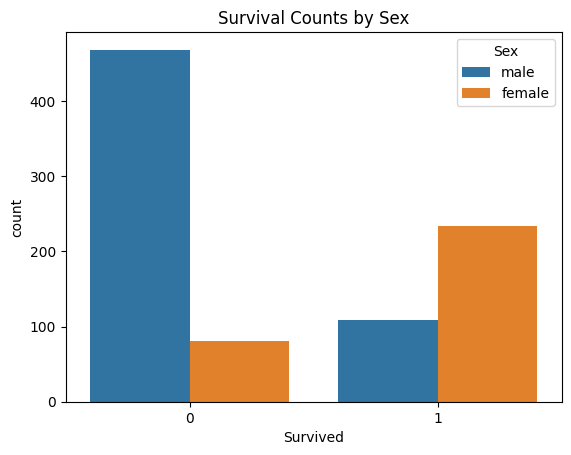

In [4]:
# Survival rate by Sex
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Counts by Sex')
plt.show()

#### 📊Section 4: Data Cleaning

In [5]:
# Fill missing Embarked with the most common value
data.fillna({'Embarked': data['Embarked'].mode()[0]}, inplace=True)

# Fill missing Age with median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Optionally, drop Cabin (too many missing values)
data.drop('Cabin', axis=1, inplace=True)

#### 🏗️Section 5: Feature Engineering

In [6]:
# Create FamilySize feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Create IsAlone feature
data['IsAlone'] = 1  # initialize to yes/alone
data.loc[data['FamilySize'] > 1, 'IsAlone'] = 0  # if FamilySize > 1 -> not alone

# Extract Title from Name
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles together
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
data['Title'] = data['Title'].replace(rare_titles, 'Rare')

# Replace misspellings
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Encode categorical columns: 'Sex', 'Embarked', and 'Title'
label_encoder = LabelEncoder()

# Encode 'Sex'
data['Sex'] = label_encoder.fit_transform(data['Sex'])  # male = 0, female = 1

# Encode 'Embarked' - filling NaN values before encoding
data['Embarked'] = label_encoder.fit_transform(data['Embarked'].fillna('S'))  # Filling missing values before encoding

# Encode 'Title' column
data['Title'] = label_encoder.fit_transform(data['Title'])

#### 🧠Section 6: Model Building

In [7]:
# Split the data
X = data.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

#### 📈Section 7: Model Evaluation

In [8]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

